In [14]:
from gpxplotter import read_gpx_file, create_folium_map, add_segment_to_map
import gpxpy
import pandas as pd
import matplotlib.pyplot as plt
import geopandas
import contextily as ctx

Here, I will make a short analysis of a running trip i did in my hometown Cambridge, MA. I will see how much of the city I covered during my trip.

### Import data from Garmin 

Data is imported from Garmin in a ".gpx" file. Some features are saved (more exist)

In [73]:
df = pd.DataFrame(columns=['lon', 'lat', 'alt', 'time', 'hr', 'distance', 'pace'])

for track in read_gpx_file('Cambridge_082921.gpx'):
    for i, segment in enumerate(track['segments']):
        for j, seg_i in enumerate(segment['lon']):
            df = df.append({'lon': segment['lon'][j], 'lat' : segment['lat'][j], 'alt' : segment['elevation'][j], 'time' :segment['time'][j].replace(tzinfo=None), 'hr' : segment['hr'][j], 'distance': segment['distance'][j], 'pace': segment['pace'][j]}, ignore_index=True)

    

We now have the latitude and longitude of our data, as well as elevation, pace, heartrate, and distance. To figure out how much of Cambridge, MA I have explored, I now download a geojson file of all roads in Cambridge.

In [93]:
# found here: https://github.com/cambridgegis/cambridgegis_data/blob/main/Basemap/Roads/BASEMAP_Roads.geojson
gdf = geopandas.read_file("BASEMAP_Roads.geojson")


GeoPandas is used to store the data. This allows for interpretation of the latitude and longitude, so I convert my dataframe into a GeoDataFrame as well. The type of lat/lon is specified in the feature "crs".

In [81]:
df_new = geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(df.lon, df.lat))
df_new.crs = "EPSG:4326"

I wish to plot the data on top of a map, to do so, I need to convert the crs-type.

In [84]:
gdf = gdf.to_crs(epsg=3857)
df_new = df_new.to_crs(epsg=3857)


Now we can plot the roads of Cambridge together with my running trip! By eye, one can see how much it covers. 

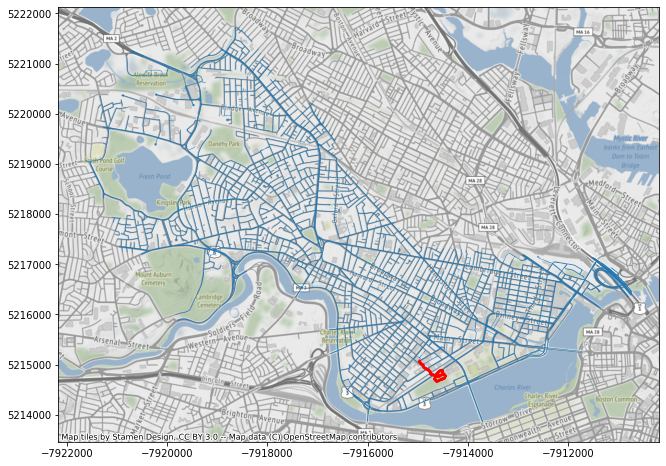

In [92]:
fig, ax = plt.subplots(figsize=(20,8))
gdf.plot(ax = ax) # plotting all roads of Cambridge
df_new.plot(ax=ax, markersize=1, color='r') # plotting my Cambridge trip
ctx.add_basemap(ax) # adding the map underneath the roads.
